In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from mlxtend.feature_selection \
    import SequentialFeatureSelector as SBS

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
x= pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
lr = LogisticRegression()

In [6]:
sbs = SBS(estimator=lr,
          k_features=(1,3),
          forward = False,
          scoring = 'accuracy',
          cv = 5)

In [7]:
sbs = sbs.fit(x, iris.target)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
sbs.k_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [9]:
sbs_results = pd.DataFrame(sbs.get_metric_dict()).\
    T. \
    sort_values(by='avg_score',ascending = False)

In [10]:
sbs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.032061,0.024944,0.012472
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437


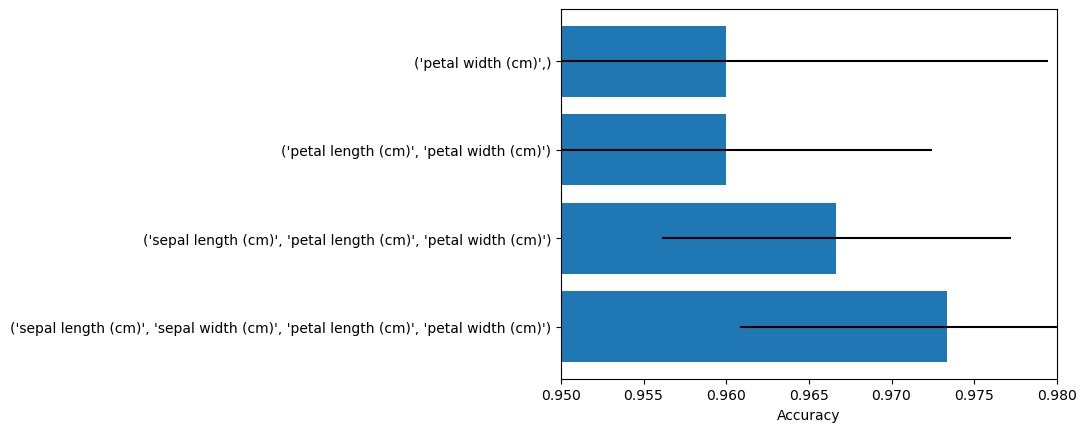

In [12]:
fig, ax = plt.subplots()

y_pos = np.arange(len(sbs_results))
ax.barh(y_pos,sbs_results['avg_score'],\
    xerr = sbs_results['std_err'])

ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')

plt.xlim([0.95,0.98])

plt.show()